# Bedmachine Grids
**Description:**  Gridded data in EPSG 3431 projection. Topographic layers, uncertainties, and masks.

Requires an EarthData login, see [link](../../how_to/download_NASA_data.ipynb) for how to configure this. 

**Dataset:** 

National Snow and Ice Data Center. “IceBridge BedMachine Greenland, Version 5,” October 21, 2020. https://nsidc.org/data/idbmg4/versions/5.

**Associated paper:** 

N.A.

In [1]:
%%capture
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions, utils

In [2]:
fetch.bedmachine(
    layer="bed",
    hemisphere="north",
    spacing=5000,
)

<xarray.DataArray 'bed' (y: 549, x: 305)> Size: 670kB
dask.array<open_dataset-bed, shape=(549, 305), dtype=float32, chunksize=(275, 305), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 4kB -3.378e+06 -3.372e+06 ... -6.425e+05 -6.375e+05
  * x        (x) float64 2kB -6.475e+05 -6.425e+05 ... 8.675e+05 8.725e+05
Attributes:
    Conventions:   CF-1.7
    title:         
    history:       gmt grdsample @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G...
    description:   
    actual_range:  [-5544.27490234375, 3240.066650390625]
    long_name:     z

In [ ]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # uncertainties
    "errbed",
    # others
    "ice_thickness",
    "dataid",
    "geoid",
    "mask",
    "source",
]

grids = []
for name in layer_names:
    data = fetch.bedmachine(
        layer=name,
        # available options
        hemisphere="north",
        spacing=5e3,  # if >=5km, will use preprocessed grid
        # region,
        # registration, # "g" for gridline or "p" for pixel
        # reference, # "eigen-6c4" or "ellipsoid"
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for surface
grid spacing: 5000.0 m
grid region: (-647500.0, 872500.0, -3377500.0, -637500.0)
grid zmin: -0.00464886287227
grid zmax: 3240.26293945
grid registration: g
##########
Info for icebase
grid spacing: 5000.0 m
grid region: (-647500.0, 872500.0, -3377500.0, -637500.0)
grid zmin: -1055.84020996
grid zmax: 3240.06640625
grid registration: g
##########
Info for bed
grid spacing: 5000.0 m
grid region: (-647500.0, 872500.0, -3377500.0, -637500.0)
grid zmin: -5544.27490234
grid zmax: 3240.06665039
grid registration: g
##########
Info for errbed
grid spacing: 5000.0 m
grid region: (-647500.0, 872500.0, -3377500.0, -637500.0)
grid zmin: -8.39897711558e-06
grid zmax: 1000.00250244
grid registration: g
##########
Info for ice_thickness
grid spacing: 5000.0 m
grid region: (-647500.0, 872500.0, -3377500.0, -637500.0)
grid zmin: -0.00641952548176
grid zmax: 3374.90136719
grid registration: g
##########
Info for dataid
grid spacing: 5000.0 m
grid region: (-647500.0, 872500.0, -3377500.0

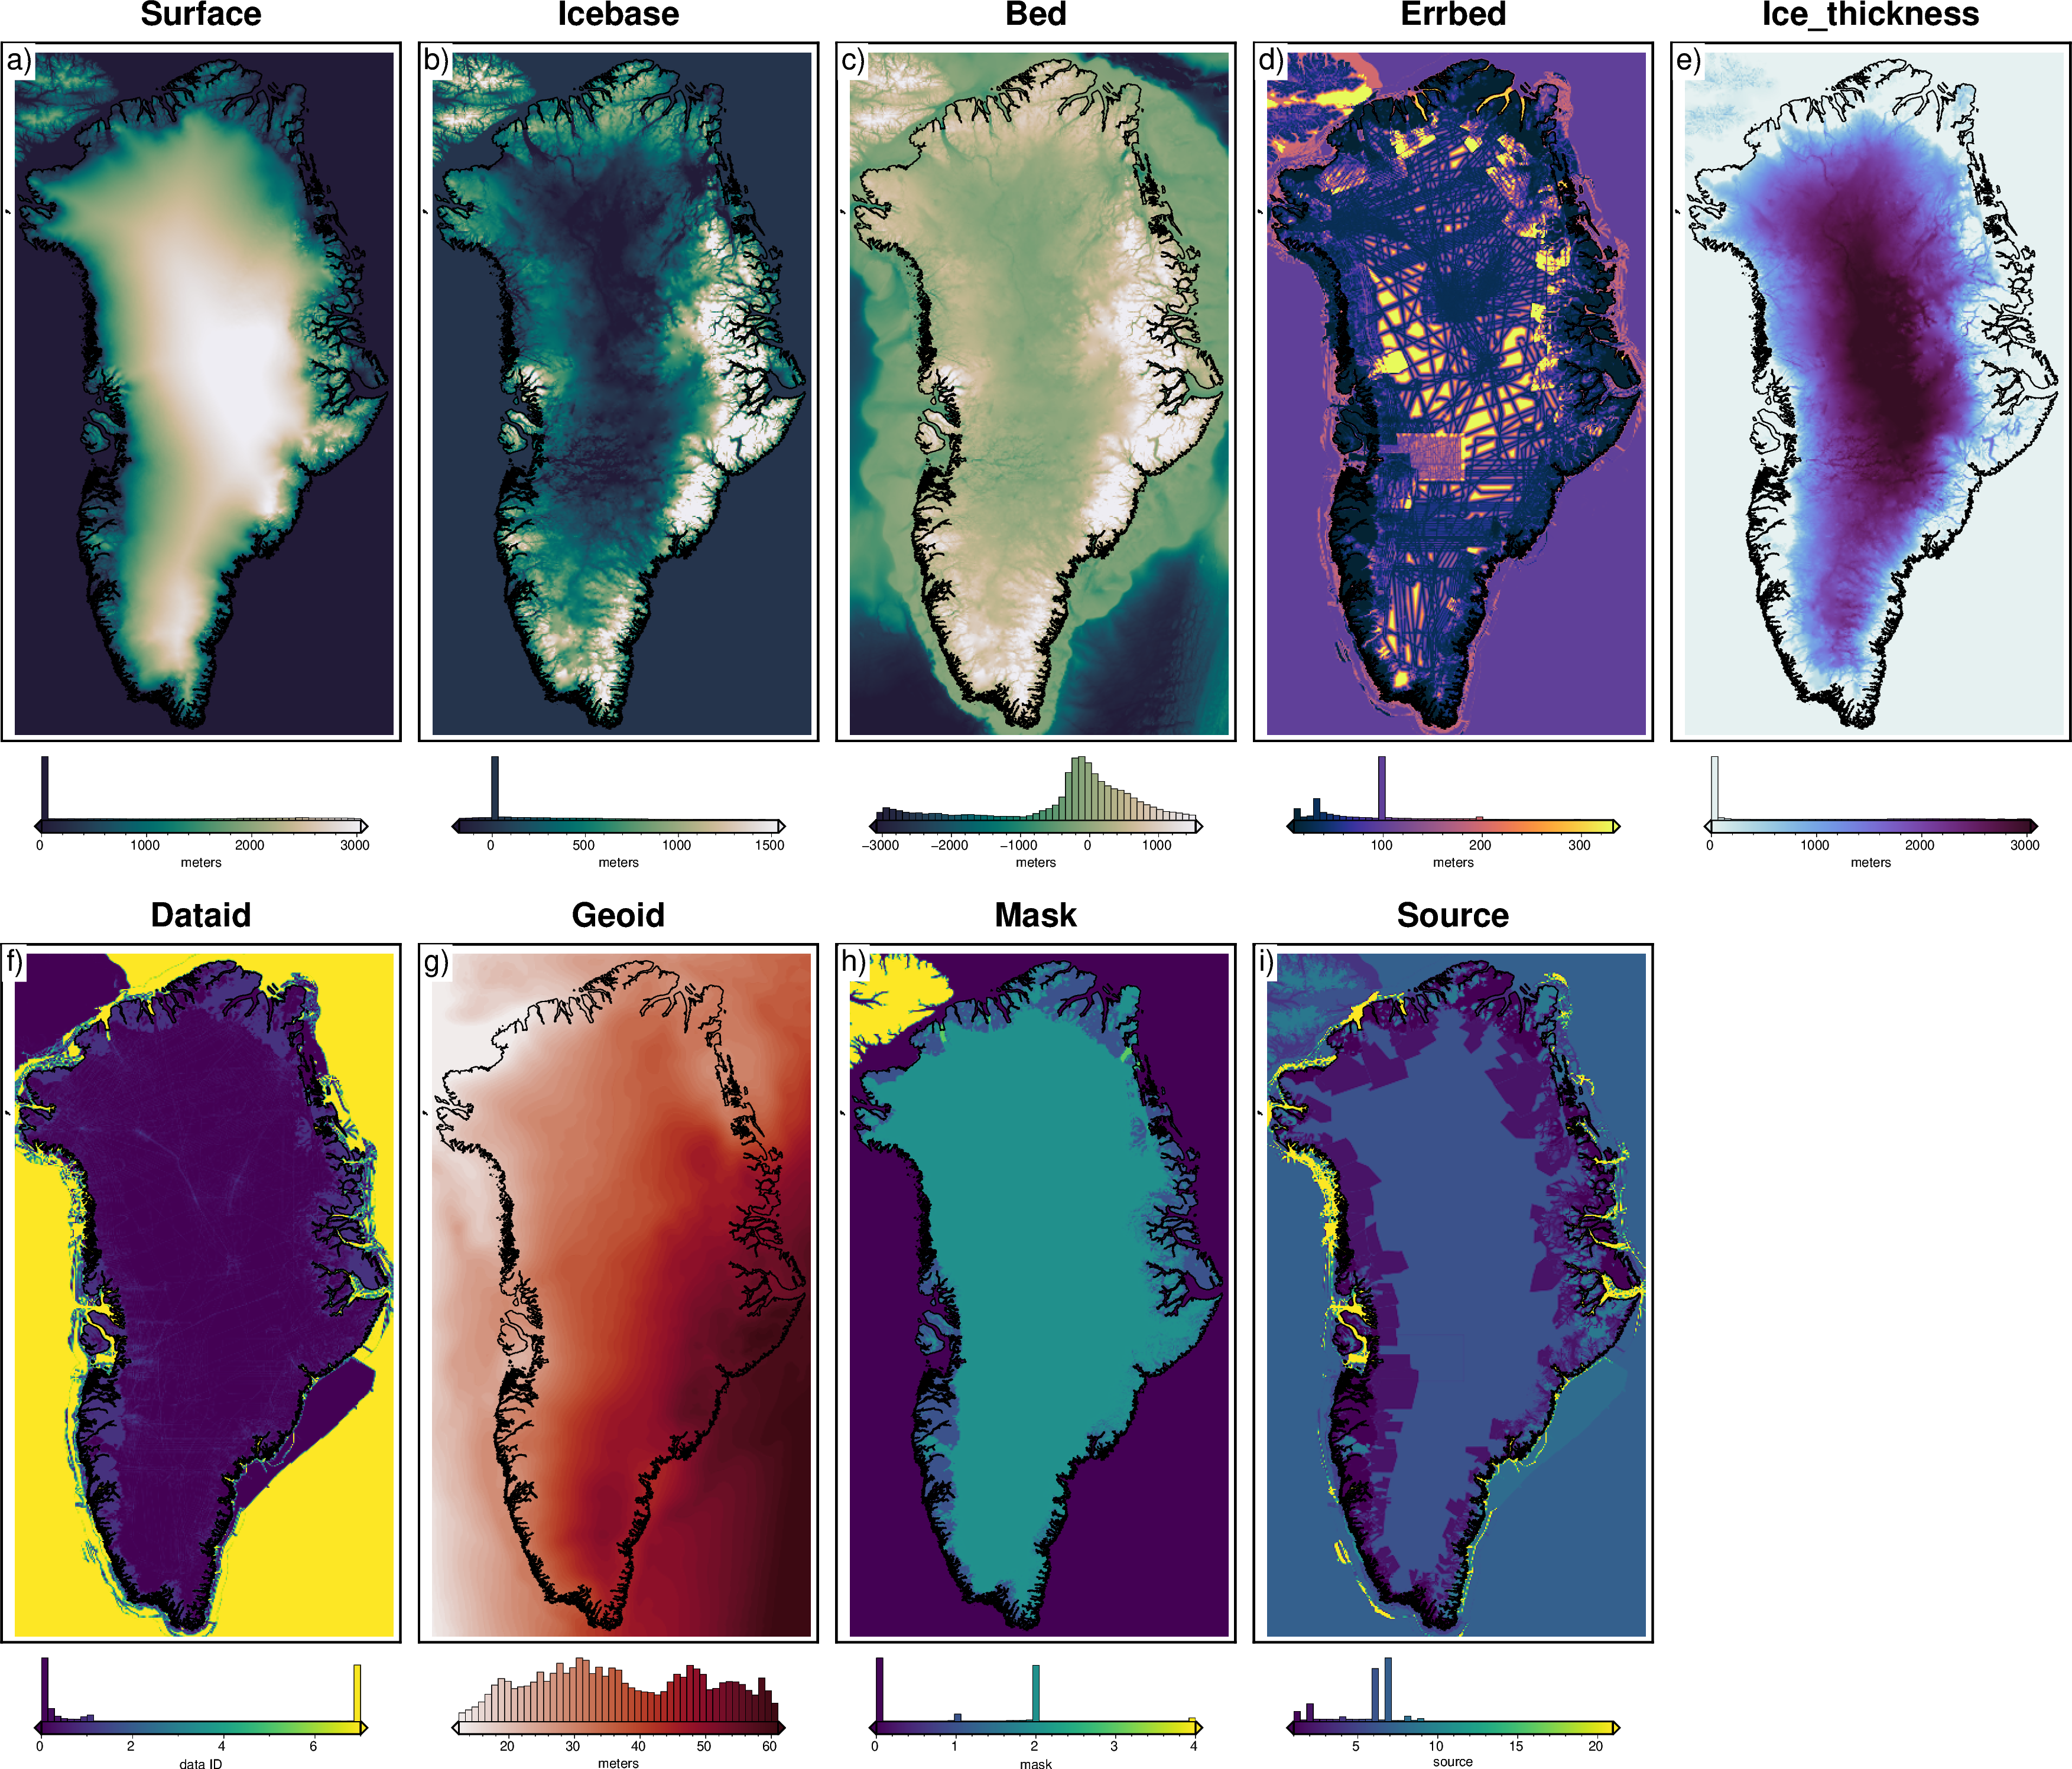

In [5]:
cmaps = [
    "rain",
    "rain",
    "rain",
    "thermal",
    "dense",
    "viridis",
    "balance+h0",
    "viridis",
    "viridis",
]
cbar_labels = ["meters"] * 5 + ["data ID", "meters", "mask", "source"]

reverse_cpts = [True] * 3 + [False] * 6

fig = maps.subplots(
    grids,
    dims=(2, 5),
    titles=[t.capitalize() for t in layer_names],
    cmaps=cmaps,
    reverse_cpts=reverse_cpts,
    cbar_labels=cbar_labels,
    region=regions.greenland,
    hist=True,
    coast=True,
    robust=True,
    hemisphere="north",
)

fig.show(dpi=200)